### Chain Message Passing
 Demo for chain-based message passing
 Boston Univeristy
 For the students in CA 542 Machine Learning

In [1]:
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
###############################
# 0. Set the parameter numbers#
###############################
# number of nodes
N = 10

# number of states
K = 256

# the coefficients for data term
lambda_data = 0.04

# the coefficients for the smoothness term
lambda_smooth = 0.04

# the potencial function
m_potential_func = 'L1'


In [3]:
import matplotlib.image as mpimg
import matplotlib._png as png
import numpy as np
import numpy.matlib
data = png.read_png_int("Lena-noise.png")
psi = np.zeros(data.shape).tolist()
foo = np.matlib.repmat(np.arange(1,K+1,1),K,1)
dist = abs(foo - np.transpose(foo))
a = np.arange(0,K,1)
a = np.matlib.repmat(a,K,1)
p = 1/K**2 + np.zeros((K,K))
print(sum(p))


[0.00390625 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625
 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625
 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625
 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625
 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625
 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625
 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625
 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625
 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625
 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625
 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625
 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625
 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625
 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625
 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625 0.0039

In [27]:
##################################
# 1. Setup the potential function#
##################################
# data is the observed random value
try:
    data
except NameError:
    y = np.concatenate([np.matlib.repmat(6,1,N//2), np.matlib.repmat(30,1,N//2)]).reshape((1,N))
    data = y + np.matlib.randn(1,10)*3
# define uniary potentials
if m_potential_func == 'L1':
    P = -lambda_data * abs(np.matlib.repmat(data,K,1) - np.matlib.repmat(np.arange(1,K+1,1).reshape((K,1)),1,N))

elif m_potential_func == 'L2':
    P = -lambda_data * (np.matlib.repmat(data,K,1) - np.matlib.repmat(np.arange(1,K+1,1).reshape((K,1)),1,N))**2
foo = np.matlib.repmat(np.arange(1,K+1,1),K,1)
dist = abs(foo - np.transpose(foo))
psi = {}
# define pair-wise potentials
for i in range(N-1):
    if m_potential_func == 'L1':
        psi[i] = -lambda_smooth*dist
    elif m_potential_func == 'L2':  
        psi[i] = -lambda_smooth*dist**2;

# compose the potentials
for i in range(N-1):
    psi[i] = np.matlib.repmat(P[:,i],1,K) + psi[i]
psi[N-2] = np.matlib.repmat(np.transpose(P[:,N-1]),K,1) + psi[N-2]
print(psi[0])

[[-0.04884477 -0.08884477]
 [-0.04884477 -0.00884477]]


In [3]:
######################
# 2. Message passing #
######################
# forward and backward messages
fm = {}
bm = {}
for i in range(N):
    fm[i] = np.zeros((1,K))
    bm[i] = np.zeros((K,1))
    
# energy
fm[0] = np.log(np.sum(np.exp(psi[0]),0))
bm[N-1] = np.log(np.sum(np.exp(psi[N-2]),1))
fm0 = fm.copy()
bm0 = bm.copy()
# forward message passing
for i in range(1, N-1):
    fm[i] = np.log(np.sum(np.exp(np.matlib.repmat(np.transpose(fm0[i-1]),1,K) + psi[i]), 0))
    fm[i] = fm[i] - np.min(fm[i])
    
# backward message

for i in range(N-2,1,-1):
    x = np.exp(np.matlib.repmat(np.transpose(bm0[i+1]),K,1) + psi[i-1])
    x = np.sum(x, 1)
    bm[i] = np.log(x)
    bm[i] = bm[i] - np.min(bm[i])
# fm0 = fm.copy()
# bm0 = bm.copy()

In [4]:
########################
# 3. Compute marginals #
########################
marginal = {}
for i in range(N):
    marginal[i] = np.zeros((1,K))

for i in range(N):
    if i > 0:
        x = (marginal[i] + fm[i-1])
        marginal[i] = marginal[i] + fm[i-1]
    if i < N-1:
        marginal[i] = marginal[i] + np.transpose(bm[i+1])
    marginal[i] = np.exp(marginal[i] - np.min(marginal[i]))
    # normalize the marginal
    marginal[i] = marginal[i]/ np.sum(marginal[i])
    
Marginals = np.zeros((K,N))
DataOnly = np.zeros((K,N))

for i in range(N):
    Marginals[:,i] = marginal[i].reshape(K)
    DataOnly[:,i] = np.exp(P[:,i]).reshape(K)
    DataOnly[:,i] = DataOnly[:,i] / np.sum(DataOnly[:,i])


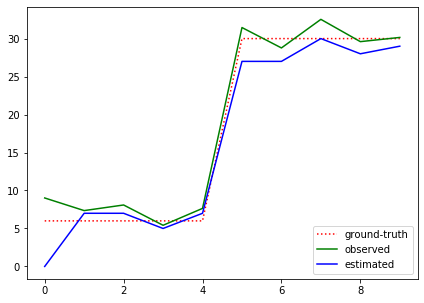

In [5]:
#####################
# 4. Output results #
#####################
outputs = np.array([np.argmax(marginal[i]) for i in range(N)])

plt.figure(figsize=(7,5))
plt.plot(y[0], 'r:', label='ground-truth')
plt.plot(np.array(data)[0],'g', label='observed')
plt.plot(outputs,'b', label='estimated')
plt.legend(loc='lower right')
plt.show()

